In [1]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "Uv3Ccd0oSCf9LgawJx12EAqYl"
CONSUMER_SECRET = "NdsEcNJvTIhBVD8ApxthiidqxuY8MdKzmzPyb1tLdWCSDvLhW4"
OAUTH_TOKEN = "469275739-tpD9kkY4CCl2r8IZ2CimxNuF9DiEGtdb0fKwWLBK"
OAUTH_TOKEN_SECRET = "3Fx1ECS8mv4feMg6vfHsnFTGE5ExV845QHLPIgHuZOKF4"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets!!!")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="κορονοϊος",count='100',lang='el')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="κορονοϊος",count='100',lang='el', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        # No more next pages
        break

I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 97  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
We Got  3897  tweets!!!


In [3]:
tweets

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Jun 29 10:45:41 +0000 2022',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 3350858639,
     'id_str': '3350858639',
     'indices': [3, 14],
     'name': 'Giorgos Kakarinos, MD',
     'screen_name': 'GKakarinos'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 1542096963675496448,
  'id_str': '1542096963675496448',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'el',
  'metadata': {'iso_language_code': 'el', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 5,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,
   'created_at': 'Tue Jun 28 21:35:18 +0000 2022',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [{'display_url': 't

In [22]:
tweets_df = pd.DataFrame(tweets)

In [23]:
tweets_df.head()

created_at                   id               id_str  \
0  Wed Jun 29 10:45:41 +0000 2022  1542096963675496448  1542096963675496448   
1  Wed Jun 29 10:44:48 +0000 2022  1542096742065266689  1542096742065266689   
2  Wed Jun 29 10:43:05 +0000 2022  1542096308349149190  1542096308349149190   
3  Wed Jun 29 10:39:26 +0000 2022  1542095391717572611  1542095391717572611   
4  Wed Jun 29 10:33:36 +0000 2022  1542093921496571904  1542093921496571904   

                                                text  truncated  \
0  RT @GKakarinos: Βέλγιο και Γερμανία, επαναλαμβ...      False   
1  RT @GKakarinos: Σοβαρά τώρα θα κάνει κανένας α...      False   
2  RT @maria_alexea: Ο διάσημος ψυχολόγος λέει: "...      False   
3  RT @News247gr: Κορονοϊός - Διασπορά: "Έκρηξη" ...      False   
4  RT @GKakarinos: Σοβαρά τώρα θα κάνει κανένας α...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [{'text': 'εμβολιου', 'indices': ...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'εμβολιου', 'indices': ...   

                                            metadata  \
0  {'iso_language_code': 'el', 'result_type': 're...   
1  {'iso_language_code': 'el', 'result_type': 're...   
2  {'iso_language_code': 'el', 'result_type': 're...   
3  {'iso_language_code': 'el', 'result_type': 're...   
4  {'iso_language_code': 'el', 'result_type': 're...   

                                              source  in_reply_to_status_id  \
0  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
1  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
2  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   
3  <a href="http://placeholder.test" rel="nofollo...                    NaN   
4  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   

  in_reply_to_status_id_str  ...  retweet_count favorite_count favorited  \
0                      None  ...              5              0     False   
1                      None  ...             42              0     False   
2                      None  ...              4              0     False   
3                      None  ...              2              0     False   
4                      None  ...             42              0     False   

  retweeted lang possibly_sensitive quoted_status_id quoted_status_id_str  \
0     False   el                NaN              NaN                  NaN   
1     False   el                NaN              NaN                  NaN   
2     False   el              False              NaN                  NaN   
3     False   el              False              NaN                  NaN   
4     False   el                NaN              NaN                  NaN   

  extended_entities  quoted_status  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  

[5 rows x 30 columns]

In [24]:
tweets_df.tail()

created_at                   id  \
3892  Mon Jun 20 05:18:24 +0000 2022  1538753107538108418   
3893  Mon Jun 20 05:15:13 +0000 2022  1538752308225445890   
3894  Mon Jun 20 05:14:51 +0000 2022  1538752215174750208   
3895  Mon Jun 20 05:14:14 +0000 2022  1538752061478686721   
3896  Mon Jun 20 05:10:39 +0000 2022  1538751158411481089   

                   id_str                                               text  \
3892  1538753107538108418  RT @CKastamonitis: Κορονοϊός: Παραδοχή «βόμβα»...   
3893  1538752308225445890  Κορονοϊός - Παγώνη: «Η παραλλαγή 4 είναι πιο μ...   
3894  1538752215174750208  Κορονοϊός: Δημοσίευμα-«βόμβα» για την προέλευσ...   
3895  1538752061478686721  Κορονοϊός: Οι νοσηλείες αυξάνονται και οι ειδι...   
3896  1538751158411481089  "Άχρηστο βάρος πάνω στη γη"\n\n#Russia #Putin ...   

      truncated                                           entities  \
3892      False  {'hashtags': [], 'symbols': [], 'user_mentions...   
3893      False  {'hashtags': [], 'symbols': [], 'user_mentions...   
3894      False  {'hashtags': [], 'symbols': [], 'user_mentions...   
3895      False  {'hashtags': [], 'symbols': [], 'user_mentions...   
3896       True  {'hashtags': [{'text': 'Russia', 'indices': [2...   

                                               metadata  \
3892  {'iso_language_code': 'el', 'result_type': 're...   
3893  {'iso_language_code': 'el', 'result_type': 're...   
3894  {'iso_language_code': 'el', 'result_type': 're...   
3895  {'iso_language_code': 'el', 'result_type': 're...   
3896  {'iso_language_code': 'el', 'result_type': 're...   

                                                 source  \
3892  <a href="https://mobile.twitter.com" rel="nofo...   
3893  <a href="https://thestandard.gr" rel="nofollow...   
3894  <a href="http://publicize.wp.com/" rel="nofoll...   
3895  <a href="https://www.tromaktiko.gr" rel="nofol...   
3896  <a href="https://mobile.twitter.com" rel="nofo...   

      in_reply_to_status_id in_reply_to_status_id_str  ...  retweet_count  \
3892                    NaN                      None  ...              5   
3893                    NaN                      None  ...              0   
3894                    NaN                      None  ...              0   
3895                    NaN                      None  ...              0   
3896                    NaN                      None  ...              0   

     favorite_count favorited retweeted lang possibly_sensitive  \
3892              0     False     False   el              False   
3893              0     False     False   el              False   
3894              0     False     False   el              False   
3895              0     False     False   el              False   
3896             12     False     False   el              False   

     quoted_status_id quoted_status_id_str  \
3892              NaN                  NaN   
3893              NaN                  NaN   
3894              NaN                  NaN   
3895              NaN                  NaN   
3896     1.538633e+18  1538633280760778763   

                                      extended_entities  \
3892                                                NaN   
3893  {'media': [{'id': 1538752306078007296, 'id_str...   
3894                                                NaN   
3895                                                NaN   
3896                                                NaN   

                                          quoted_status  
3892                                                NaN  
3893                                                NaN  
3894                                                NaN  
3895                                                NaN  
3896  {'created_at': 'Sun Jun 19 21:22:15 +0000 2022...  

[5 rows x 30 columns]

In [25]:
tweets_df.shape

(3897, 30)

In [26]:
tweets_df.drop(["id","id_str","metadata","in_reply_to_status_id","in_reply_to_status_id_str","favorited", 
                "retweeted","lang","possibly_sensitive","quoted_status_id","quoted_status_id_str", "extended_entities", "quoted_status",
                "truncated", "in_reply_to_user_id", "in_reply_to_user_id_str", "in_reply_to_screen_name", "user", "geo", "coordinates", "place",
                "contributors", "retweeted_status", "is_quote_status", "entities"],axis=1,inplace=True)

In [27]:
tweets_df

created_at  \
0     Wed Jun 29 10:45:41 +0000 2022   
1     Wed Jun 29 10:44:48 +0000 2022   
2     Wed Jun 29 10:43:05 +0000 2022   
3     Wed Jun 29 10:39:26 +0000 2022   
4     Wed Jun 29 10:33:36 +0000 2022   
...                              ...   
3892  Mon Jun 20 05:18:24 +0000 2022   
3893  Mon Jun 20 05:15:13 +0000 2022   
3894  Mon Jun 20 05:14:51 +0000 2022   
3895  Mon Jun 20 05:14:14 +0000 2022   
3896  Mon Jun 20 05:10:39 +0000 2022   

                                                   text  \
0     RT @GKakarinos: Βέλγιο και Γερμανία, επαναλαμβ...   
1     RT @GKakarinos: Σοβαρά τώρα θα κάνει κανένας α...   
2     RT @maria_alexea: Ο διάσημος ψυχολόγος λέει: "...   
3     RT @News247gr: Κορονοϊός - Διασπορά: "Έκρηξη" ...   
4     RT @GKakarinos: Σοβαρά τώρα θα κάνει κανένας α...   
...                                                 ...   
3892  RT @CKastamonitis: Κορονοϊός: Παραδοχή «βόμβα»...   
3893  Κορονοϊός - Παγώνη: «Η παραλλαγή 4 είναι πιο μ...   
3894  Κορονοϊός: Δημοσίευμα-«βόμβα» για την προέλευσ...   
3895  Κορονοϊός: Οι νοσηλείες αυξάνονται και οι ειδι...   
3896  "Άχρηστο βάρος πάνω στη γη"\n\n#Russia #Putin ...   

                                                 source  retweet_count  \
0     <a href="https://mobile.twitter.com" rel="nofo...              5   
1     <a href="https://mobile.twitter.com" rel="nofo...             42   
2     <a href="https://mobile.twitter.com" rel="nofo...              4   
3     <a href="http://placeholder.test" rel="nofollo...              2   
4     <a href="https://mobile.twitter.com" rel="nofo...             42   
...                                                 ...            ...   
3892  <a href="https://mobile.twitter.com" rel="nofo...              5   
3893  <a href="https://thestandard.gr" rel="nofollow...              0   
3894  <a href="http://publicize.wp.com/" rel="nofoll...              0   
3895  <a href="https://www.tromaktiko.gr" rel="nofol...              0   
3896  <a href="https://mobile.twitter.com" rel="nofo...              0   

      favorite_count  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3892               0  
3893               0  
3894               0  
3895               0  
3896              12  

[3897 rows x 5 columns]

In [29]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [30]:
tweets_df.dtypes

created_at        datetime64[ns]
text                      object
source                    object
retweet_count              int64
favorite_count             int64
dtype: object

In [32]:
tweets_df['year'] = pd.DatetimeIndex(tweets_df['created_at']).year
tweets_df['month'] = pd.DatetimeIndex(tweets_df['created_at']).month
tweets_df['day'] = pd.DatetimeIndex(tweets_df['created_at']).day

In [35]:
tweets_df['text'] = tweets_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
tweets_df.tail()

created_at                                               text  \
3892 2022-06-20 05:18:24  RT @CKastamonitis: Κορονοϊός: Παραδοχή «βόμβα»...   
3893 2022-06-20 05:15:13  Κορονοϊός - Παγώνη: «Η παραλλαγή 4 είναι πιο μ...   
3894 2022-06-20 05:14:51  Κορονοϊός: Δημοσίευμα-«βόμβα» για την προέλευσ...   
3895 2022-06-20 05:14:14  Κορονοϊός: Οι νοσηλείες αυξάνονται και οι ειδι...   
3896 2022-06-20 05:10:39  "Άχρηστο βάρος πάνω στη γη"\n\n#Russia #Putin ...   

                                                 source  retweet_count  \
3892  <a href="https://mobile.twitter.com" rel="nofo...              5   
3893  <a href="https://thestandard.gr" rel="nofollow...              0   
3894  <a href="http://publicize.wp.com/" rel="nofoll...              0   
3895  <a href="https://www.tromaktiko.gr" rel="nofol...              0   
3896  <a href="https://mobile.twitter.com" rel="nofo...              0   

      favorite_count  year  month  day  
3892               0  2022      6   20  
3893               0  2022      6   20  
3894               0  2022      6   20  
3895               0  2022      6   20  
3896              12  2022      6   20

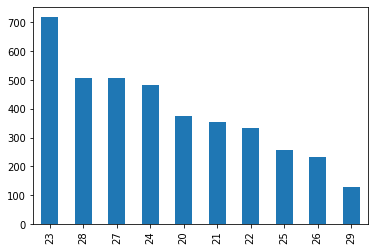

In [38]:
tweets_df['day'].value_counts().plot(kind='bar')

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/covid_twitter.tsv", sep='\t')